In [1]:
import numpy as np
# Imports necesarios
import pandas as pd
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import optimize
import sympy
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
columnas=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]

#dataf = pd.read_csv("/content/drive/MyDrive/kp/Multi_Modelo/tabla_modelo_dbnoS.txt",sep='\t')#,usecols=columnas)
#dataf = pd.read_csv("/content/drive/MyDrive/kp/Multi_Modelo/tabla_modelo_dbnoS_crom9595.txt",sep='\t')#,usecols=columnas)
#dataf = pd.read_csv("/content/drive/MyDrive/kp/Multi_Modelo/tabla_modelo_dbnoSnohps75.txt",sep='\t')#,usecols=columnas)
#dataf = pd.read_csv("/content/drive/MyDrive/kp/Multi_Modelo/tabla_modelo_dbnoSnohps95_m3m.txt",sep='\t')#,usecols=columnas)
dataf = pd.read_csv("/content/drive/MyDrive/kp/Multi_Modelo/tabla_modelo_dbnoSnohps75_m3m.txt",sep='\t')#,usecols=columnas)
dataf.describe()


,#,Plasmidspades,Plasflow,Profundidad,BD_plasmidos,BD_No_cromosoma,Real
count,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000
mean,1041.000000,0.355257,0.390302,0.128181,0.448872,0.126740,0.352376
std,601.454626,0.478706,0.487935,0.334371,0.497498,0.332762,0.477825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,520.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1041.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1561.500000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2082.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dataf.head()

,#,Contig,Plasmidspades,Plasflow,Profundidad,BD_plasmidos,BD_No_cromosoma,Real
0,0,NODE_1_length_658228_cov_7.42785,0,0,0,0,0,0
1,1,NODE_2_length_420780_cov_6.72348,0,0,0,0,0,0
2,2,NODE_3_length_375140_cov_7.71601,0,0,0,0,0,0
3,3,NODE_4_length_352270_cov_6.79852,0,0,0,0,0,0
4,4,NODE_5_length_306672_cov_7.3995,0,0,0,0,0,0


Extracción de metricas individules de clasificación


In [3]:
precision=[0,0,0,0,0]#plasmidspades,plasflow,profundidad,plasmi,No_crom
recall=[0,0,0,0,0]
f_score=[0,0,0,0,0]
vp=[0,0,0,0,0]
fp=[0,0,0,0,0]
fn=[0,0,0,0,0]
cont=0
herr='Plasmidspades','Plasflow','Profundidad','BD_plasmidos','BD_No_cromosoma'
for h in herr:
  print(h)
  pred=len(dataf[dataf[h]==1])
  ve_po=len(dataf[(dataf[h]==1)&(dataf.Real==1)])
  precision[cont]=ve_po/pred
  #print(pred)
  #print(ve_po)
  recall[cont]=ve_po/len(dataf[dataf.Real==1])
  f_score[cont]=2*(precision[cont]* recall[cont])/(precision[cont]+ recall[cont])
  cont+=1
print(precision)
print(recall)
print(f_score)
#print(ve_po)
#  vp[cont]=

Plasmidspades
Plasflow
Profundidad
BD_plasmidos
BD_No_cromosoma
[0.7986486486486486, 0.7109471094710947, 0.5730337078651685, 0.7839572192513369, 0.48484848484848486]
[0.8051771117166212, 0.7874659400544959, 0.20844686648501362, 0.9986376021798365, 0.17438692098092642]
[0.8018995929443689, 0.7472527472527473, 0.30569430569430567, 0.878370281605752, 0.2565130260521042]


Creación de variables, para el contraste final

0



BD_plasmidos
 0.4061281337047354]
0.9772117962466488]
0.5737898465171193]
El metodo con base actualizada
---------------------------------------------------------------------
BD_plasmidos
 0.4095505617977528]
0.9772117962466488]
0.5771971496437055]

Definicion del conjunto de datos para la evaluación comparativa de todos los Multi-modelos


###*Diseño de experimento con combinatoria

In [4]:
def potencia(c):
    """Calcula y devuelve el conjunto potencia del conjunto c. """
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    #print(r)
    return r+[s + [c[-1]] for s in r]
def imprime_ordenado(c):
  anexo=[]
  for e in sorted(c, key=lambda s: (len(s), s)):
    #print(e)
    anexo.append(e)
  return anexo

In [5]:
combinatoria=imprime_ordenado(potencia(['Plasmidspades','Plasflow','Profundidad','BD_plasmidos','BD_No_cromosoma']))
#print(combinatoria)
experimento=[]
labels=[]
for com in combinatoria:
  if len(com)>=2:
    linea=''
    experimento.append(com)
    for c in com:
      #print(c)
      linea+='/'+c
    labels.append(linea)
print(experimento)
#print(labels)
#print(potencia(['Plasmidspades','Plasflow','Profundidad','BD_plasmidos']))

[['BD_plasmidos', 'BD_No_cromosoma'], ['Plasflow', 'BD_No_cromosoma'], ['Plasflow', 'BD_plasmidos'], ['Plasflow', 'Profundidad'], ['Plasmidspades', 'BD_No_cromosoma'], ['Plasmidspades', 'BD_plasmidos'], ['Plasmidspades', 'Plasflow'], ['Plasmidspades', 'Profundidad'], ['Profundidad', 'BD_No_cromosoma'], ['Profundidad', 'BD_plasmidos'], ['Plasflow', 'BD_plasmidos', 'BD_No_cromosoma'], ['Plasflow', 'Profundidad', 'BD_No_cromosoma'], ['Plasflow', 'Profundidad', 'BD_plasmidos'], ['Plasmidspades', 'BD_plasmidos', 'BD_No_cromosoma'], ['Plasmidspades', 'Plasflow', 'BD_No_cromosoma'], ['Plasmidspades', 'Plasflow', 'BD_plasmidos'], ['Plasmidspades', 'Plasflow', 'Profundidad'], ['Plasmidspades', 'Profundidad', 'BD_No_cromosoma'], ['Plasmidspades', 'Profundidad', 'BD_plasmidos'], ['Profundidad', 'BD_plasmidos', 'BD_No_cromosoma'], ['Plasflow', 'Profundidad', 'BD_plasmidos', 'BD_No_cromosoma'], ['Plasmidspades', 'Plasflow', 'BD_plasmidos', 'BD_No_cromosoma'], ['Plasmidspades', 'Plasflow', 'Profundi

Experimento MultiClasificador #1, Bagging

[79.3536804308797, 71.34502923976608, 80.95238095238095, 69.53125, 74.4466800804829, 83.33333333333334, 75.73529411764706, 75.15657620041753, 40.0, 83.87096774193547, 79.56521739130434, 69.3877551020408, 77.89934354485777, 83.14606741573034, 74.60035523978686, 85.65488565488566, 73.92857142857142, 72.7969348659004, 81.63265306122449, 78.09187279151944, 76.48261758691206, 83.00395256916995, 73.01038062283737, 82.80000000000001, 81.89655172413794, 80.68833652007649]
26
['/BD_plasmidos/BD_No_cromosoma', '/Plasflow/BD_No_cromosoma', '/Plasflow/BD_plasmidos', '/Plasflow/Profundidad', '/Plasmidspades/BD_No_cromosoma', '/Plasmidspades/BD_plasmidos', '/Plasmidspades/Plasflow', '/Plasmidspades/Profundidad', '/Profundidad/BD_No_cromosoma', '/Profundidad/BD_plasmidos', '/Plasflow/BD_plasmidos/BD_No_cromosoma', '/Plasflow/Profundidad/BD_No_cromosoma', '/Plasflow/Profundidad/BD_plasmidos', '/Plasmidspades/BD_plasmidos/BD_No_cromosoma', '/Plasmidspades/Plasflow/BD_No_cromosoma', '/Plasmidspades/Plas

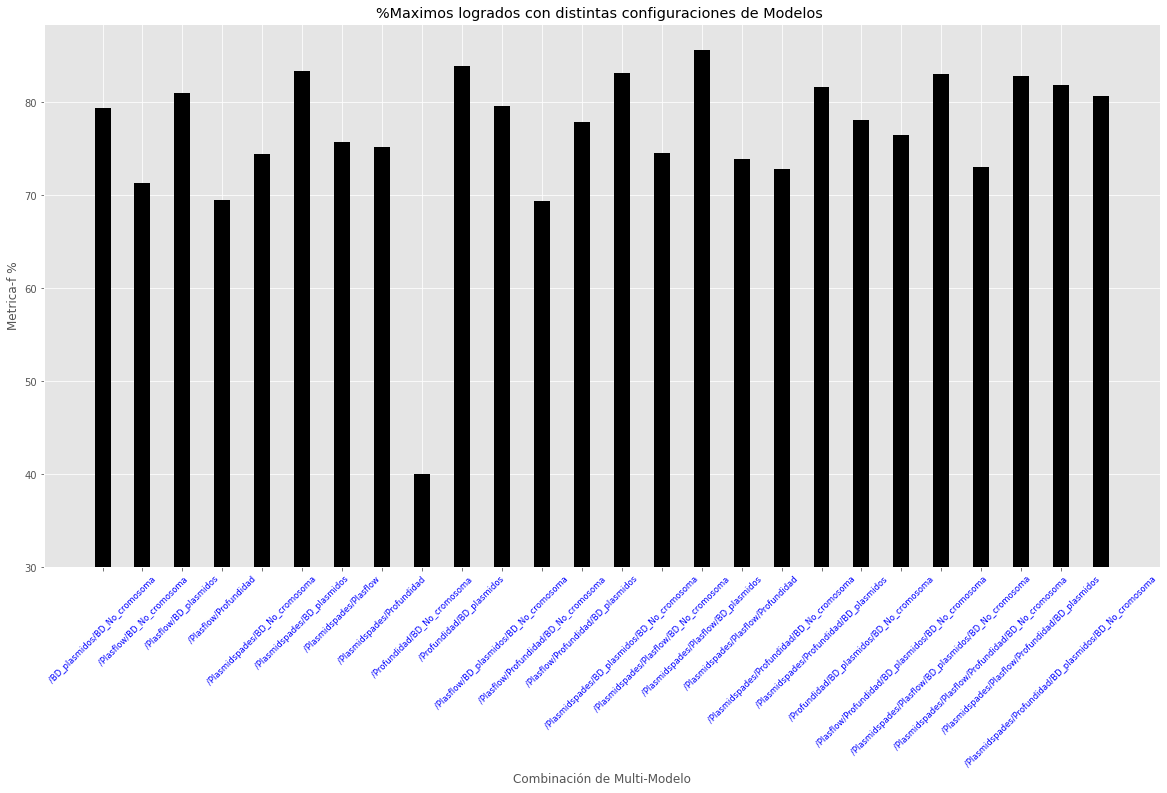

In [ ]:
from warnings import catch_warnings

maximos=[]
rangos=[]
for comb in experimento:
  tamaño=0
  X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[comb],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
  df_bag_ite=np.zeros_like(len(X_tes))
  df_bagg=X_tes.assign(Bagging=df_bag_ite)
  for co in comb:
    tamaño+=1
    df_bagg['Bagging']+=dataf[co]
    #print(co)
  df_bagg['Bagging']=df_bagg['Bagging']/tamaño
  #print(df_bagg['Bagging'].sum())
  #df_bagging=dataf.assign(Bagging=((dataf['Plasmidspades'])+dataf['Plasflow']+dataf['Profundidad']+dataf['BD_plasmidos'])/4)
  #df_bagging=dataf.assign(Bagging=((dataf['Plasmidspades'])+dataf['Plasflow']+dataf['Profundidad'])/3)
  #df_bagging.describe()
  tabla_bagging=pd.DataFrame(data=df_bagg['Bagging'])#
  tabla_bagging['Real']=y_tes
  tabla_bagging.describe()
  precision=[]
  exhaustividad=[]
  metrica_f=[]
  for lim in range(0,100):
    pred=0
    #print(lim)
    tabla_bagging['Pred']=np.where(tabla_bagging['Bagging'] > lim/100, 1, 0)
    pred=len(tabla_bagging[tabla_bagging['Pred']==1])
    #print(pred)
    #print(tabla_bagging['Pred'])
    ve_po=len(tabla_bagging[(tabla_bagging['Pred']==1)&(tabla_bagging.Real==1)])
    tam_re=len(tabla_bagging[tabla_bagging.Real==1])
    #print(tam_re)
    #print((ve_po/pred)+ (ve_po/len(tabla_bagging[tabla_bagging.Real==1]))))
    try:
      precision.append(ve_po/pred)
      exhaustividad.append(ve_po/len(tabla_bagging[tabla_bagging.Real==1]))
      metrica_f.append((((ve_po/pred)* (ve_po/len(tabla_bagging[tabla_bagging.Real==1])))/((ve_po/pred)+ (ve_po/len(tabla_bagging[tabla_bagging.Real==1]))))*200)
    except:
      precision.append(0)
      exhaustividad.append(0)
      metrica_f.append(0)
  max_local=np.max(metrica_f)
  conteo=0
  datos=''
  for met in metrica_f:
    if int(met)==int(max_local):
      datos+='-'+str(conteo)
    conteo+=1
  rangos.append(datos)
  maximos.append(np.amax(metrica_f))
#print(maximos)
coll=range(0,len(experimento)-1)
plt.figure(figsize=(20,10))
inicio=30
plt.bar(labels,maximos-(np.ones(len(maximos))*inicio),width=0.4,bottom=inicio,color='#000000')
plt.title("%Maximos logrados con distintas configuraciones de Modelos ")   # Establece el título del gráfico
plt.xlabel("Combinación de Multi-Modelo")   # Establece el título del eje x
plt.ylabel("Metrica-f %")
plt.xticks(coll,labels,size = 'small', color = 'b', rotation = 45)
print(maximos)
print(len(maximos))
print(labels)
print(len(labels))
print(rangos)
print(len(rangos))
max_max=np.max(maximos)
cont_m=0
pos_max=0
for val in maximos:
  if int(max_max)==int(val):
    pos_max=cont_m
  cont_m+=1
print('El valor maximo alcanzado es: '+str(max_max))
print('Con la combinación de modelos '+str(labels[pos_max]))
print('En el rango comprendido :'+str(rangos[pos_max])+' de selección de aciertos.')

In [ ]:

print(len(maximos))
dz.append(maximos)
print(dz)

26


NameError: ignored

In [ ]:
nom=np.linspace(0,1,100)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(nom,precision)
plt.title("%Precisión VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,2)
plt.plot(nom,exhaustividad)
plt.title("%Exhaustividad VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,3)
plt.plot(nom,metrica_f)
plt.title("%Metrica_f VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
print(np.max(metrica_f))  

82.06 con Base actualizada en el metodo de BD de plásmidos
82.107 Con base desactualizada

Experimento MultiClasificador #2, Boosting

In [ ]:
def cal_comb(al,comb):
  #print(al,comb)
  conteo=0
  alfas={}
  for a in al:
    alfas[comb[conteo]]=a
    conteo+=1
  X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[comb],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
  df_boosting=X_tes.assign(Boosting_p=np.zeros_like(len(X_tes)))
  df_boosting=df_boosting.assign(Boosting_c=np.zeros_like(len(X_tes)))
  df_boosting=df_boosting.assign(Boosting_pred=np.zeros_like(len(X_tes)))
  df_boosting['Real']=y_tes
  for mm in alfas:
    df_boosting['Boosting_p']+=np.where(df_boosting[mm]==1, alfas[mm],0)#se va sumando el numero de alfa ci + de un metodo congrue
    df_boosting['Boosting_c']+=np.where(df_boosting[mm]==0, alfas[mm],0)
  df_boosting['Boosting_pred'] = np.where(df_boosting['Boosting_p']>=df_boosting['Boosting_c'], 1,0)
  pred=len(df_boosting[df_boosting['Boosting_pred']==1])
  ve_po=len(df_boosting[(df_boosting['Boosting_pred']==1)&(df_boosting.Real==1)])
  precision=(ve_po/pred)
  exhaustividad=(ve_po/len(df_boosting[df_boosting.Real==1]))
  metrica_f=((((ve_po/pred)* (ve_po/len(df_boosting[df_boosting.Real==1])))/\
                    ((ve_po/pred)+ (ve_po/len(df_boosting[df_boosting.Real==1]))))*200)
  return metrica_f

In [ ]:
maximosB=[]
alfas=[]
epocasB=[]
calif_comb=[]
epocas=range(0,5)
for comb in experimento:
  band_cal_comb=0
  X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[comb],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
  print(comb)
  df_boosting=X_trai.assign(Boosting_p=np.zeros_like(len(X_trai)))
  df_boosting=df_boosting.assign(Boosting_c=np.zeros_like(len(X_trai)))
  df_boosting=df_boosting.assign(Boosting_pred=np.zeros_like(len(X_trai)))
  df_boosting['Real']=y_trai
  #df_bagging=dataf.assign(Bagging=((dataf['Plasmidspades'])+dataf['Plasflow']+dataf['Profundidad'])/3)
  df_boosting.describe()
  w=(np.ones(len(X_trai)))*(1/len(X_trai))
  modelos=len(comb)
  a=np.zeros((len(epocas),modelos))
  #print(a)
  error=np.zeros((len(epocas),modelos))
  error_MM=np.zeros(len(epocas))
  precision=np.zeros(len(epocas))
  exhaustividad=np.zeros(len(epocas))
  metrica_f=np.zeros(len(epocas))
  dictm={'Plasmidspades':0,'Plasflow':1,'Profundidad':2,'BD_plasmidos':3,'BD_No_cromosoma':4}
  dim={}
  for i in range(modelos):
    dim[comb[i]]=i
  for epoc in epocas:
    for m in comb:#m = metodo de predicción
      sum_e=0
      sum_w=0
      for i in range(0,len(df_boosting)):#i = observación
        if df_boosting.iloc[i][dictm[m]]!=y_trai.iloc[i]:
          sum_e+=w[i]
      sum_w=np.sum(w)
      error[epoc][int(dim[m])]=sum_e/sum_w
      a[epoc][dim[m]]=np.log((1-error[epoc][dim[m]])/error[epoc][dim[m]])+np.log(len(m)-1)
      #print('error ='+str(error[epoc][m-2]))
      #print('alfa ='+str(a[epoc][m-2]))
      for i in range(0,len(X_trai)):#i = observación
        if X_trai.iloc[i][m]!=y_trai.iloc[i]:#.iloc[i][7]:
          w[i]=w[i]*np.exp(a[epoc][dim[m]])
      w=w/w.sum()
    for mm in comb:
      df_boosting['Boosting_p']+=np.where(df_boosting[mm]==1, a[epoc][dim[m]],0)#se va sumando el numero de alfa ci + de un metodo congrue
      df_boosting['Boosting_c']+=np.where(df_boosting[mm]==0, a[epoc][dim[m]],0)
    df_boosting['Boosting_pred'] = np.where(df_boosting['Boosting_p']>=df_boosting['Boosting_c'], 1,0)
    df_boosting['Boosting_c']=np.zeros_like(len(df_boosting))
    df_boosting['Boosting_p']=np.zeros_like(len(df_boosting))
    pred=len(df_boosting[df_boosting['Boosting_pred']==1])
    #print(pred)
    #agregar el y train al dataframe para que puede comparar las columnas
    ve_po=len(df_boosting[(df_boosting['Boosting_pred']==1)&(df_boosting['Real']==1)])
    if pred>0:
      precision[epoc]=(ve_po/pred)
      exhaustividad[epoc]=(ve_po/len(df_boosting[df_boosting['Real']==1]))
      metrica_f[epoc]=((((ve_po/pred)* (ve_po/len(df_boosting['Real'][df_boosting['Real']==1])))/((ve_po/pred)+ (ve_po/len(df_boosting['Real'][df_boosting['Real']==1]))))*200)
    else:
      precision[epoc]=0
      exhaustividad[epoc]=0
      metrica_f[epoc]=0
  max=np.max(metrica_f)
  maximosB.append(max)
  cont_epoc=0
  list_epo=''
  list_alf=''
  for me in metrica_f:
    if me == max:
      #print('encontraos un maximo cñ')
      list_epo+='-'+str(cont_epoc)
      list_alf+='-'+str(a[cont_epoc])
      if band_cal_comb==0:
        calif_comb.append(cal_comb(a[cont_epoc],comb))
        band_cal_comb=1
    cont_epoc+=1
  epocasB.append(list_epo)
  alfas.append(list_alf)
fmax_b=np.max(maximosB)
cuentamax_b=0
k=0
for bo in maximosB:
  if fmax_b == bo:
    cuentamax_b=k
  k+=1
print('El maximo f-score alcanzado es : '+str(maximosB[cuentamax_b]))
print('con la combinación : '+str(labels[pos_max]))
print(' en las epocas '+str(epocasB[cuentamax_b]))
print('con los alfas '+str(alfas[cuentamax_b]))
print(calif_comb)
print(len(calif_comb))


['BD_plasmidos', 'BD_No_cromosoma']
['Plasflow', 'BD_No_cromosoma']
['Plasflow', 'BD_plasmidos']
['Plasflow', 'Profundidad']
['Plasmidspades', 'BD_No_cromosoma']
['Plasmidspades', 'BD_plasmidos']
['Plasmidspades', 'Plasflow']
['Plasmidspades', 'Profundidad']
['Profundidad', 'BD_No_cromosoma']
['Profundidad', 'BD_plasmidos']
['Plasflow', 'BD_plasmidos', 'BD_No_cromosoma']
['Plasflow', 'Profundidad', 'BD_No_cromosoma']
['Plasflow', 'Profundidad', 'BD_plasmidos']
['Plasmidspades', 'BD_plasmidos', 'BD_No_cromosoma']
['Plasmidspades', 'Plasflow', 'BD_No_cromosoma']
['Plasmidspades', 'Plasflow', 'BD_plasmidos']
['Plasmidspades', 'Plasflow', 'Profundidad']
['Plasmidspades', 'Profundidad', 'BD_No_cromosoma']
['Plasmidspades', 'Profundidad', 'BD_plasmidos']
['Profundidad', 'BD_plasmidos', 'BD_No_cromosoma']
['Plasflow', 'Profundidad', 'BD_plasmidos', 'BD_No_cromosoma']
['Plasmidspades', 'Plasflow', 'BD_plasmidos', 'BD_No_cromosoma']
['Plasmidspades', 'Plasflow', 'Profundidad', 'BD_No_cromosoma'

In [ ]:
dz.append(calif_comb)
print(len(dz))
print(dz)

NameError: ignored

Funcion de calificación del metodo boosting


Maximo F-score alcanzado 84.75390156062426
con los modelos /Plasmidspades/Plasflow/BD_plasmidos
implementando los alfas

Calificación del metodo boostin sobre conjunto de evaluación

In [ ]:
#alfas={'Plasmidspades':0.07800176, 'Plasflow':-0.0609041,'BD_plasmidos':8.93368546}
alfas={'Plasmidspades':4.33211742 , 'Plasflow':2.62176016 ,'BD_plasmidos':2.95665352}
sumf=np.sum(alfas)
print(sumf)
print(str(alfas.keys())[10:-1])
dat=['Plasmidspades','Plasflow','BD_plasmidos']
X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[dat],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
df_boosting=X_tes.assign(Boosting_p=np.zeros_like(len(X_tes)))
df_boosting=df_boosting.assign(Boosting_c=np.zeros_like(len(X_tes)))
df_boosting=df_boosting.assign(Boosting_pred=np.zeros_like(len(X_tes)))
df_boosting['Real']=y_tes
for mm in alfas:
  df_boosting['Boosting_p']+=np.where(df_boosting[mm]==1, alfas[mm],0)#se va sumando el numero de alfa ci + de un metodo congrue
  df_boosting['Boosting_c']+=np.where(df_boosting[mm]==0, alfas[mm],0)
df_boosting['Boosting_pred'] = np.where(df_boosting['Boosting_p']>=df_boosting['Boosting_c'], 1,0)
pred=len(df_boosting[df_boosting['Boosting_pred']==1])
ve_po=len(df_boosting[(df_boosting['Boosting_pred']==1)&(df_boosting.Real==1)])
precision=(ve_po/pred)
exhaustividad=(ve_po/len(df_boosting[df_boosting.Real==1]))
metrica_f=((((ve_po/pred)* (ve_po/len(df_boosting[df_boosting.Real==1])))/\
                  ((ve_po/pred)+ (ve_po/len(df_boosting[df_boosting.Real==1]))))*200)
df_boosting.describe()
print(precision,exhaustividad,metrica_f)

{'Plasmidspades': 4.33211742, 'Plasflow': 2.62176016, 'BD_plasmidos': 2.95665352}
['Plasmidspades', 'Plasflow', 'BD_plasmidos']
0.7923076923076923 0.9321266968325792 85.65488565488566


Boosting para una combinación de clasificadores unica

In [ ]:
df_boosting=dataf.assign(Boosting_p=np.zeros_like(len(dataf)))
df_boosting=df_boosting.assign(Boosting_c=np.zeros_like(len(dataf)))
df_boosting=df_boosting.assign(Boosting_pred=np.zeros_like(len(dataf)))
#df_bagging=dataf.assign(Bagging=((dataf['Plasmidspades'])+dataf['Plasflow']+dataf['Profundidad'])/3)
#df_boosting.describe()
w=(np.ones(len(dataf)))*(1/len(dataf))
epocas=range(0,50)
modelos=4
a=np.zeros((len(epocas),modelos))
#print(a)
error=np.zeros((len(epocas),modelos))
error_MM=np.zeros(len(epocas))
precision=np.zeros(len(epocas))
exhaustividad=np.zeros(len(epocas))
metrica_f=np.zeros(len(epocas))
for epoc in epocas:
  for m in range(2,modelos+2):#m = modelo de predicción sin homologia
    sum_e=0
    sum_w=0
    for i in range(0,len(df_boosting)):#i = observación
      if df_boosting.iloc[i][m]!=df_boosting.iloc[i][7]:
        sum_e+=w[i]
    sum_w=np.sum(w)
    error[epoc][m-2]=sum_e/sum_w
    a[epoc][m-2]=np.log((1-error[epoc][m-2])/error[epoc][m-2])#+np.log(2)
    #print('error ='+str(error[epoc][m-2]))
    #print('alfa ='+str(a[epoc][m-2]))
    for i in range(0,len(dataf)):#i = observación
      if dataf.iloc[i][m]!=dataf.iloc[i][7]:
        w[i]=w[i]*np.exp(a[epoc][m-2])
    w=w/w.sum()
  df_boosting['Boosting_p']+=np.where(df_boosting['Plasmidspades']==1, a[epoc][0],0)
  df_boosting['Boosting_p']+=np.where(df_boosting['Plasflow']==1, a[epoc][1],0)
  df_boosting['Boosting_p']+=np.where(df_boosting['Profundidad']==1, a[epoc][2],0)
  df_boosting['Boosting_p']+=np.where(df_boosting['BD_plasmidos']==1, a[epoc][3],0)
  df_boosting['Boosting_c']+=np.where(df_boosting['Plasmidspades']==0, a[epoc][0],0)
  df_boosting['Boosting_c']+=np.where(df_boosting['Plasflow']==0, a[epoc][1],0)
  df_boosting['Boosting_c']+=np.where(df_boosting['Profundidad']==0, a[epoc][2],0)
  df_boosting['Boosting_c']+=np.where(df_boosting['BD_plasmidos']==0, a[epoc][3],0)
  df_boosting['Boosting_pred'] = np.where(df_boosting['Boosting_p']>=df_boosting['Boosting_c'], 1,0)
  df_boosting['Boosting_c']=np.zeros_like(len(df_boosting))
  df_boosting['Boosting_p']=np.zeros_like(len(df_boosting))
  pred=len(df_boosting[df_boosting['Boosting_pred']==1])
  print(pred)
  ve_po=len(df_boosting[(df_boosting['Boosting_pred']==1)&(df_boosting.Real==1)])
  if pred>0:
    precision[epoc]=(ve_po/pred)
    exhaustividad[epoc]=(ve_po/len(df_boosting[df_boosting.Real==1]))
    metrica_f[epoc]=((((ve_po/pred)* (ve_po/len(df_boosting[df_boosting.Real==1])))/((ve_po/pred)+ (ve_po/len(df_boosting[df_boosting.Real==1]))))*200)

828
1343
1358
1270
740
740
740
740
801
813
544
1343
1343
1343
1282
1270
1634
740
740
740
1600
1270
362
813
1270
631
1236
1646
813
1816
1270
255
1795
631
1236
1646
643
1331
1646
825
1645
1270
643
1236
1646
725
1419
1634
267
813


In [ ]:
a_plasmidspa=[]
for alf in a:
  a_plasmidspa.append(alf[0])

In [ ]:
exis=np.linspace(0,1,50)
plt.figure(figsize=(10,5))
plt.plot(exis,a_plasmidspa)
plt.title("%Comportamiento de alfa para herramienta plasmidspades ")   # Establece el título del gráfico
plt.xlabel("Epoca")   # Establece el título del eje x
plt.ylabel("Valor Alfa")

In [ ]:
nom=np.linspace(0,1,50)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(nom,precision)
plt.title("%Precisión VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Epoca")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,2)
plt.plot(nom,exhaustividad)
plt.title("%Exhaustividad VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Epoca")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,3)
plt.plot(nom,metrica_f)
plt.title("%Metrica_f VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Epoca")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")

In [ ]:

print(maxf)

56.11782477341391


Experimento MultiClasificador #3, Staking


In [ ]:
dataf.describe()


,#,Plasmidspades,Plasflow,Profundidad,BD_plasmidos,BD_No_cromosoma,Real
count,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000,2083.000000
mean,1041.000000,0.355257,0.390302,0.128181,0.448872,0.126740,0.352376
std,601.454626,0.478706,0.487935,0.334371,0.497498,0.332762,0.477825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,520.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1041.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1561.500000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,2082.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


15
/Plasmidspades/Plasflow/BD_plasmidos
21
/Plasmidspades/Plasflow/BD_plasmidos/BD_No_cromosoma
23
/Plasmidspades/Plasflow/Profundidad/BD_plasmidos
El valor maximo alcanzado es: 0.9123897561665801
Con la combinación de modelos /Plasmidspades/Plasflow/Profundidad/BD_plasmidos


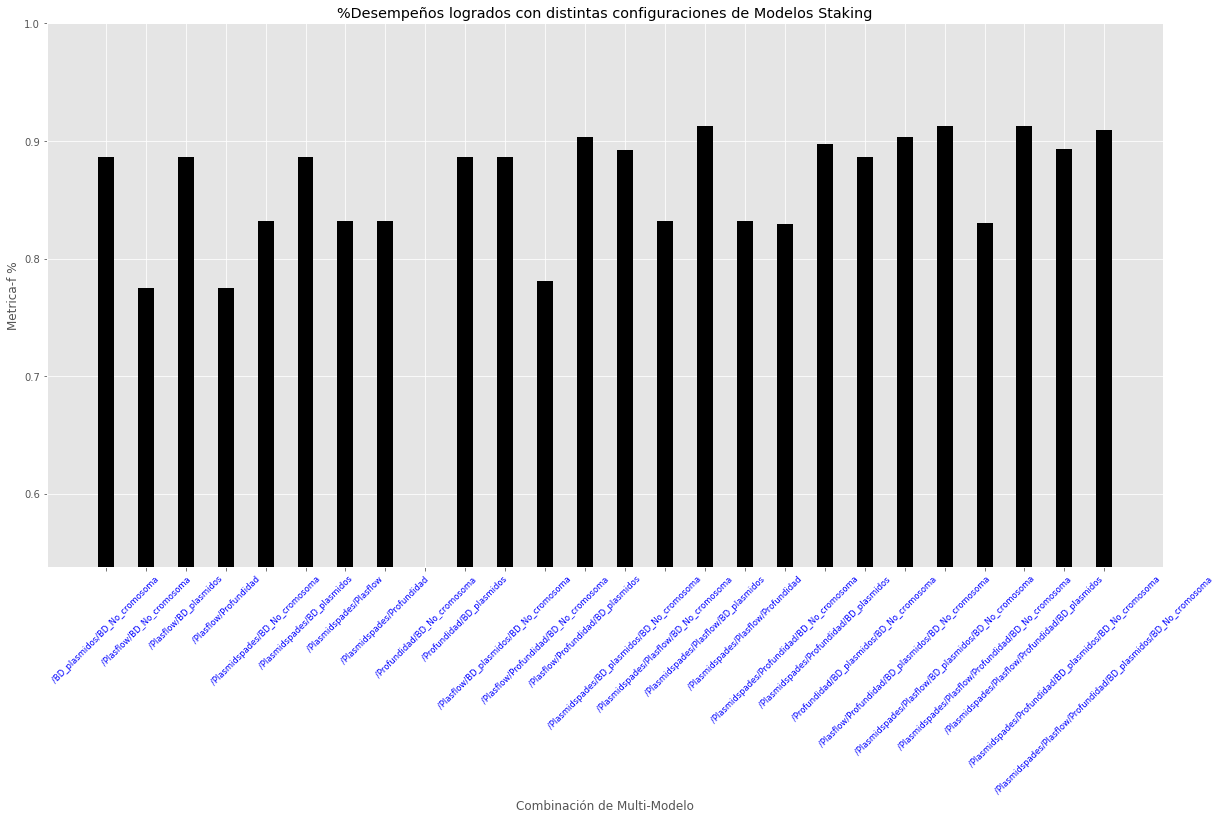

In [ ]:
metrica_f_svm=[]
for comb in experimento:
  dimx=np.zeros(shape=(len(dataf),len(comb)))
  stakingx=pd.DataFrame(dimx,columns=comb)
  tamaño=0
  for co in comb:
    stakingx[co]=dataf[co]
  stakingy=dataf.iloc[:,7]
  X_train, X_test, y_train, y_test = train_test_split(stakingx,stakingy,\
                                                      test_size=0.33, random_state=42)
  clasificador = svm.SVC()
  clasificador.fit(X_train, y_train)
  predicted = clasificador.predict(X_test)
  salida=classification_report(y_test, predicted,digits=3,output_dict=True)
  metrica_f_svm.append(salida['macro avg']['f1-score'])#tomar el valor de f de los parametros de calificación
coll=range(0,len(experimento))
plt.figure(figsize=(20,10))
inicio=0
plt.bar(labels,metrica_f_svm,width=0.4,bottom=inicio,color='#000000')
plt.title("%Desempeños logrados con distintas configuraciones de Modelos Staking")   # Establece el título del gráfico
plt.xlabel("Combinación de Multi-Modelo")   # Establece el título del eje x
plt.ylabel("Metrica-f %")
plt.xticks(coll,labels,size = 'small', color = 'b', rotation = 45)
min=np.min(metrica_f_svm)
plt.ylim(min,1)
max_s=np.max(metrica_f_svm)
max_s
pos_max_s=0
cont_s=0
for val in metrica_f_svm:
  if max_s==val:
    pos_max_s=cont_s
    print(cont_s)
    print(labels[pos_max_s])
  cont_s+=1
print('El valor maximo alcanzado es: '+str(max_s))
print('Con la combinación de modelos '+str(labels[pos_max_s]))


In [ ]:
metrica_f_svm

[0.8867336468094222,
 0.774659403709683,
 0.8867336468094222,
 0.774659403709683,
 0.8319733363981151,
 0.8867336468094222,
 0.8319733363981151,
 0.8319733363981151,
 0.5373983638604923,
 0.8867336468094222,
 0.8867336468094222,
 0.7804966014703842,
 0.9030634517707874,
 0.8922970050974982,
 0.8319733363981151,
 0.9123897561665801,
 0.8319733363981151,
 0.829063422745038,
 0.89763381197309,
 0.8867336468094222,
 0.9037640881000699,
 0.9123897561665801,
 0.8305171494239678,
 0.9123897561665801,
 0.8931872146118722,
 0.9093339357656538]

Extraccion de parametros de configuración del modelo

In [ ]:
comb_final=['Plasmidspades','Plasflow','Profundidad','BD_plasmidos','BD_No_cromosoma']
dimx=np.zeros(shape=(len(dataf),len(comb_final)))
metrica_f_svm=[]
stakingxF=pd.DataFrame(dimx,columns=comb_final)
tamaño=0
for co in comb_final:
  stakingxF[co]=dataf[co]
stakingyF=dataf.iloc[:,7]
X_train, X_test, y_train, y_test = train_test_split(stakingxF,stakingyF,\
                                                    test_size=0.33, random_state=42)
clasificador = svm.SVC()
clasificador.fit(X_train.values, y_train)
predicted = clasificador.predict(X_test)
salida=classification_report(y_test, predicted,digits=3,output_dict=True)
metrica_f_svm.append(salida['macro avg']['f1-score'])#tomar el valor de f de los parametros de calificación
print(metrica_f_svm)

[0.9093339357656538]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [6]:
from joblib import dump, load
#dump(clasificador, '/content/drive/MyDrive/kp/Multi_Modelo/clasificador5m.joblib') 



probar multimodelo

In [7]:
modelo=load('/content/drive/MyDrive/kp/Multi_Modelo/clasificador5m.joblib')

In [ ]:
X_test

,Plasmidspades,Plasflow,Profundidad,BD_plasmidos
1576,1,0,1,1
831,0,0,0,0
1352,0,0,0,0
982,1,1,0,1
1831,0,0,1,1
...,...,...,...,...
167,0,0,0,0
2017,0,1,1,1
286,0,0,0,0
1870,1,1,0,1


In [ ]:
arreglo=np.array([[1,1,1,0,1]])
salida=modelo.predict(arreglo)
print(salida)

[1]


calculo de f para un unico conjunto de modelos de clasificación


In [8]:
stakingx=dataf.iloc[:,2:6]
#stakingx.describe()
stakingy=dataf.iloc[:,7]
#stakingy.describe()
X_train, X_test, y_train, y_test = train_test_split(stakingx,stakingy,\
                                                    test_size=0.33, random_state=42)
clasificador = svm.SVC()
clasificador.fit(X_train, y_train)
predicted = clasificador.predict(X_test)
salida=classification_report(y_test, predicted,digits=3,output_dict=True)
#print (classification_report(y_test, predicted,digits=3))
print(salida)

{'0': {'precision': 0.9661399548532731, 'recall': 0.9164882226980728, 'f1-score': 0.9406593406593406, 'support': 467}, '1': {'precision': 0.8408163265306122, 'recall': 0.9321266968325792, 'f1-score': 0.8841201716738197, 'support': 221}, 'accuracy': 0.9215116279069767, 'macro avg': {'precision': 0.9034781406919427, 'recall': 0.924307459765326, 'f1-score': 0.9123897561665801, 'support': 688}, 'weighted avg': {'precision': 0.9258833823833487, 'recall': 0.9215116279069767, 'f1-score': 0.9224977762032359, 'support': 688}}


In [ ]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix,xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()
    print (classification_report(y_test, pred_y,digits=3))

In [ ]:
LABELS=['Plásmidos','Cromosoma']
mostrar_resultados(y_test, predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_mo

El valor maximo alcanzado es: 0.9123897561665801
Con la combinación de modelos /Plasmidspades/Plasflow/Profundidad/BD_plasmidos/BD_No_cromosoma


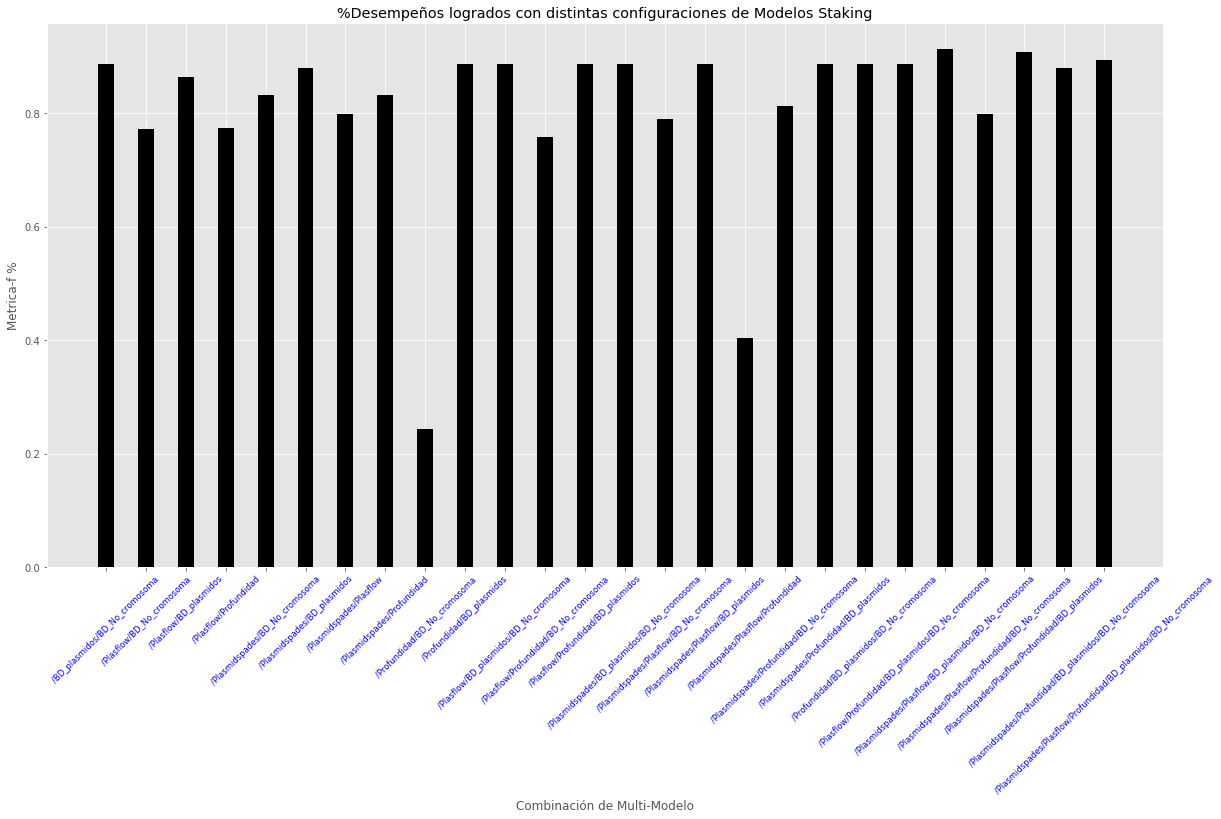

In [ ]:
metrica_f_SGD=[]
for comb in experimento:
  dimx=np.zeros(shape=(len(dataf),len(comb)))
  stakingxSGD=pd.DataFrame(dimx,columns=comb)
  tamaño=0
  for co in comb:
    stakingxSGD[co]=dataf[co]
  stakingy=dataf.iloc[:,7]
  X_train, X_test, y_train, y_test = train_test_split(stakingxSGD,stakingy,\
                                                      test_size=0.33, random_state=42)
  clasificadorSGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
  clasificadorSGD.fit(X_train, y_train)
  predictedSGD = clasificadorSGD.predict(X_test)
  salida=classification_report(y_test, predictedSGD,digits=3,output_dict=True)
  metrica_f_SGD.append(salida['macro avg']['f1-score'])#tomar el valor de f de los parametros de calificación
coll=range(0,len(experimento))
plt.figure(figsize=(20,10))
inicio=0
plt.bar(labels,metrica_f_SGD,width=0.4,bottom=inicio,color='#000000')
plt.title("%Desempeños logrados con distintas configuraciones de Modelos Staking")   # Establece el título del gráfico
plt.xlabel("Combinación de Multi-Modelo")   # Establece el título del eje x
plt.ylabel("Metrica-f %")
plt.xticks(coll,labels,size = 'small', color = 'b', rotation = 45)
max_s=np.max(metrica_f_SGD)
pos_max_s=0
cont_s=0
for val in metrica_f_SGD:
  if int(max_s)==int(val):
    pos_max_s=cont_s
  cont_s+=1
print('El valor maximo alcanzado es: '+str(max_s))
print('Con la combinación de modelos '+str(labels[pos_max_s]))

In [ ]:
clasificadorSGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clasificadorSGD.fit(X_train, y_train)
predictedSGD = clasificador.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
LABELS=['Plásmidos','Cromosoma']
mostrar_resultados(y_test, predictedSGD)

Experimento MultiClasificador #4, Hard Voting
cada modelo tiene el mismo peso



[84.0983606557377, 75.64674397859055, 84.26501035196688, 75.72815533980582, 78.64963503649635, 85.92132505175985, 82.03842940685045, 78.70370370370371, 43.39622641509434, 86.94915254237289, 83.05582761998042, 74.72527472527474, 82.42074927953891, 86.20000000000002, 80.0974817221771, 90.8418131359852, 80.0, 76.10773240660296, 83.99209486166008, 82.47588424437299, 80.95238095238095, 88.03571428571429, 78.2264449722882, 87.3114463176575, 83.90804597701148, 84.66152527849185]
['-0', '-0', '-1', '-0', '-0', '-1', '-0', '-0', '-0', '-0', '-1', '-0', '-1', '-1', '-0', '-1', '-0', '-0', '-1', '-0', '-1', '-1', '-0', '-1', '-1', '-1']
El valor maximo alcanzado es: 90.8418131359852
Con la combinación de modelos /Plasmidspades/Plasflow/BD_plasmidos
en los rangos de selección superiores a :-1


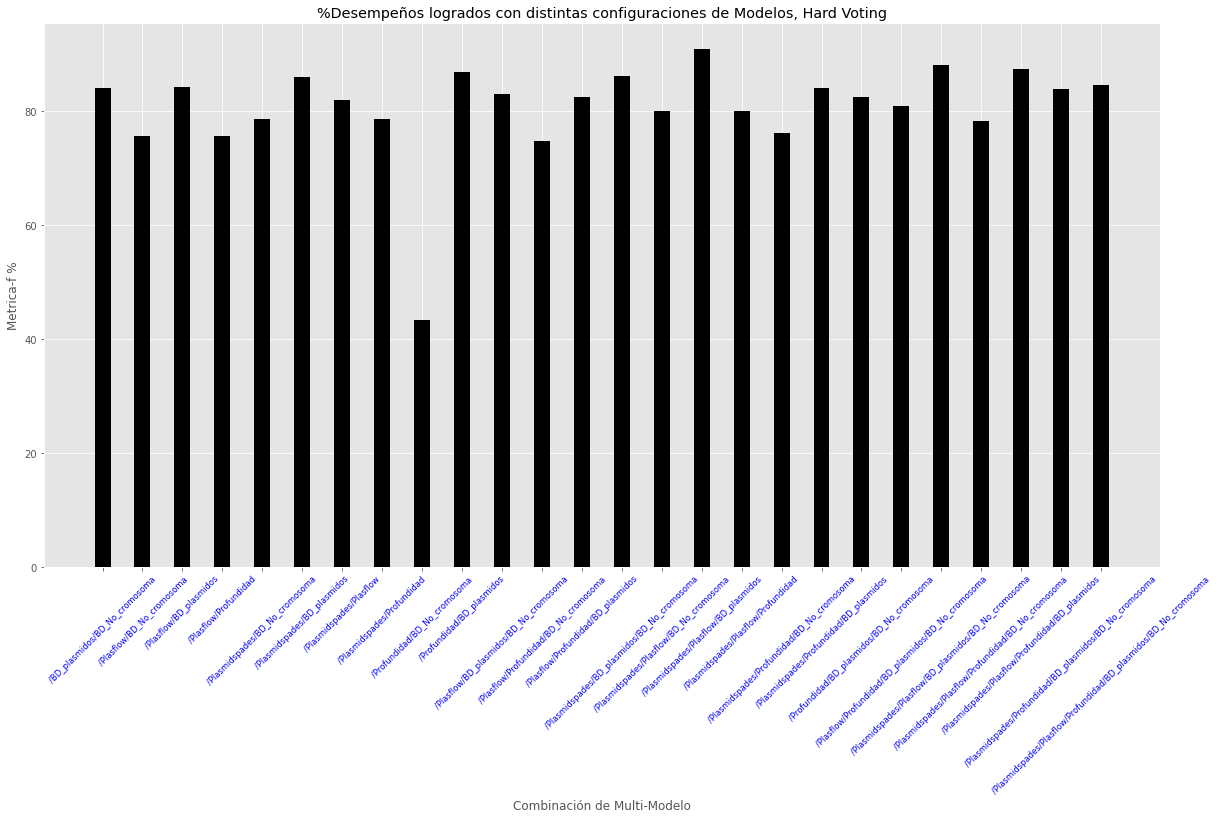

In [ ]:
maximosHV=[]
rangosHV=[]
for comb in experimento:
  tamaño=0
  X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[comb],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
  df_HV_ite=np.zeros_like(len(X_trai))
  df_HV=X_trai.assign(HV=df_HV_ite)
  for co in comb:
    tamaño+=1
    df_HV['HV']+=X_trai[co]
  #añadir la columna vote
  tabla_HV=pd.DataFrame(data=df_HV['HV'])
  #aisla la tabla real y voto para calificar
  tabla_HV['Real']=y_trai
  precision=[]
  exhaustividad=[]
  metrica_f=[]
  for lim in range(0,tamaño):
    pred=0
    #print(lim)
    tabla_HV['Pred']=np.where(tabla_HV['HV'] > lim, 1, 0)
    pred=len(tabla_HV[tabla_HV['Pred']==1])
    ve_po=len(tabla_HV[(tabla_HV['Pred']==1)&(tabla_HV.Real==1)])
    precision.append(ve_po/pred)
    exhaustividad.append(ve_po/len(tabla_HV[tabla_HV.Real==1]))
    metrica_f.append((((ve_po/pred)* (ve_po/len(tabla_HV[tabla_HV.Real==1])))/((ve_po/pred)+ (ve_po/len(tabla_HV[tabla_HV.Real==1]))))*200)
  maximoHV=np.max(metrica_f)
  conteo=0
  datos=''
  for met in metrica_f:
    if met==maximoHV:
      datos+='-'+str(conteo)
    conteo+=1
  rangosHV.append(datos)
  maximosHV.append(maximoHV)
coll=range(0,len(experimento))
plt.figure(figsize=(20,10))
inicio=0
plt.bar(labels,maximosHV,width=0.4,bottom=inicio,color='#000000')
plt.title("%Desempeños logrados con distintas configuraciones de Modelos, Hard Voting")   # Establece el título del gráfico
plt.xlabel("Combinación de Multi-Modelo")   # Establece el título del eje x
plt.ylabel("Metrica-f %")
plt.xticks(coll,labels,size = 'small', color = 'b', rotation = 45)
max_maxHV=np.max(maximosHV)
pos_max_HV=0
cont_HV=0
for val in maximosHV:
  if max_maxHV==val:
    pos_max_HV=cont_HV
  cont_HV+=1
print(maximosHV)
print(rangosHV)
print('El valor maximo alcanzado es: '+str(max_maxHV))
print('Con la combinación de modelos '+str(labels[pos_max_HV]))
print('en los rangos de selección superiores a :'+str(rangosHV[pos_max_HV]))


Calificacion conjunto de evaluación

In [ ]:
dat=['Plasmidspades','Plasflow','BD_plasmidos']
X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[dat],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
df_HV_ite=np.zeros_like(len(X_tes))
df_HV=X_tes.assign(HV=df_HV_ite)
for co in dat:
  df_HV['HV']+=X_tes[co]
tabla_HV=pd.DataFrame(data=df_HV['HV'])
#aisla la tabla real y voto para calificar
tabla_HV['Real']=y_tes
tabla_HV['Pred']=np.where(tabla_HV['HV'] > 1, 1, 0)
pred=len(tabla_HV[tabla_HV['Pred']==1])
ve_po=len(tabla_HV[(tabla_HV['Pred']==1)&(tabla_HV.Real==1)])
precision=(ve_po/pred)
exhaustividad=(ve_po/len(tabla_HV[tabla_HV.Real==1]))
metrica_f=((((ve_po/pred)* (ve_po/len(tabla_HV[tabla_HV.Real==1])))/((ve_po/pred)+ (ve_po/len(tabla_HV[tabla_HV.Real==1]))))*200)
print(precision,exhaustividad,metrica_f)

0.7923076923076923 0.9321266968325792 85.65488565488566


graficar comportamiento de un modelo pre,rec,f

In [ ]:
nom=range(0,4)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(nom,precision)
plt.title("%Precisión VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,2)
plt.plot(nom,exhaustividad)
plt.title("%Exhaustividad VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,3)
plt.plot(nom,metrica_f)
plt.title("%Metrica_f VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
print(np.max(metrica_f))  

Experimento MultiClasificador #5, Weighted vote

90.8418131359852
-88-89-90-91-92-93-94-95-96-97-98-99
El valor maximo alcanzado es: 90.8418131359852
Con la combinación de modelos /Plasmidspades/Plasflow/BD_plasmidos
en los rangos de selección superiores a :-1


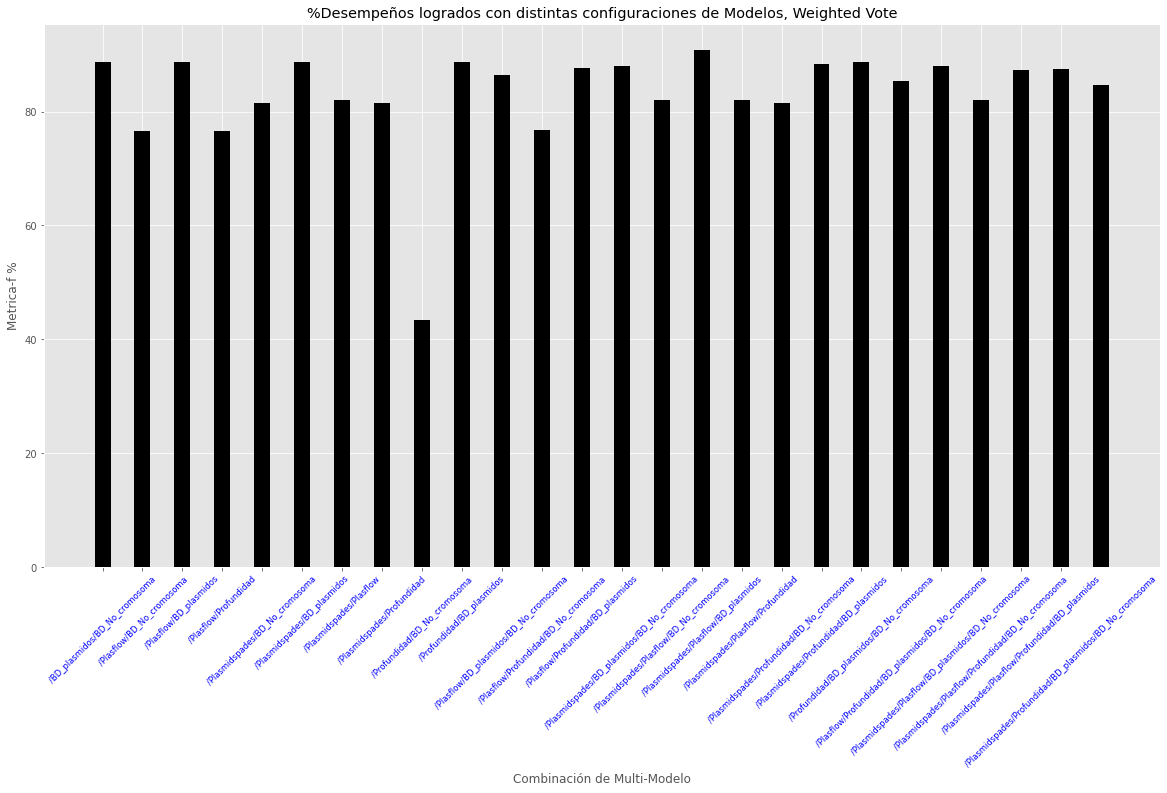

In [ ]:
#f=[0.7999999999999999, 0.7474619289340101, 0.2982456140350877, 0.5737898465171193, 0.23454429572976418]
f=[0.8018995929443689, 0.7472527472527473, 0.30569430569430567, 0.878370281605752, 0.2565130260521042]
sumf=np.sum(f)
#print(sumf)
fnor=f/sumf
M_debiles=['Plasmidspades','Plasflow','Profundidad','BD_plasmidos','BD_No_cromosoma']
pesos={}
maximos_wei=[]
rangos_wei=[]
for i in range(0,5):
  pesos[M_debiles[i]]=f[i]
#print(np.sum(fnor))
for comb in experimento:
  tamaño=0
  X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[comb],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
  df_weighted_ini=np.zeros_like(len(X_trai))
  df_weighted=X_trai.assign(Weighted=df_weighted_ini)
  for co in comb:
    tamaño+=1
    df_weighted['Weighted']+=dataf[co]*pesos[co]
  #df_weighted=dataf.assign(Weighted=((dataf['Plasmidspades']*fnor[0])+(dataf['Plasflow']*fnor[1])+(dataf['Profundidad']*fnor[2])+(dataf['BD_plasmidos']*fnor[3])))
  #df_bagging=dataf.assign(Bagging=((dataf['Plasmidspades'])+dataf['Plasflow']+dataf['Profundidad'])/3)
  #df_weighted.describe()
  tabla_weighted=pd.DataFrame(data=df_weighted['Weighted'])
  tabla_weighted['Real']=y_trai
  #tabla_weighted.describe()
  precision=[]
  exhaustividad=[]
  metrica_f=[]
  for lim in range(0,100):
    pred=0
    tabla_weighted['Pred']=np.where(tabla_weighted['Weighted'] > lim/100, 1, 0)
    pred=len(tabla_weighted[tabla_weighted['Pred']==1])
    ve_po=len(tabla_weighted[(tabla_weighted['Pred']==1)&(tabla_weighted.Real==1)])
    if pred>0:
      precision.append(ve_po/pred)
      exhaustividad.append(ve_po/len(tabla_weighted[tabla_weighted.Real==1]))
      metrica_f.append((((ve_po/pred)* (ve_po/len(tabla_weighted[tabla_weighted.Real==1])))/\
                        ((ve_po/pred)+ (ve_po/len(tabla_weighted[tabla_weighted.Real==1]))))*200)
    else:
      precision.append(0)
      exhaustividad.append(0)
      metrica_f.append(0)
  maximo_wei=np.max(metrica_f)
  conteo=0
  datos=''
  for met in metrica_f:
    if met==maximo_wei:
      datos+='-'+str(conteo)
    conteo+=1
  rangos_wei.append(datos)
  maximos_wei.append(maximo_wei)
coll=range(0,len(experimento)-1)
plt.figure(figsize=(20,10))
inicio=0
plt.bar(labels,maximos_wei,width=0.4,bottom=inicio,color='#000000')
plt.title("%Desempeños logrados con distintas configuraciones de Modelos, Weighted Vote")   # Establece el título del gráfico
plt.xlabel("Combinación de Multi-Modelo")   # Establece el título del eje x
plt.ylabel("Metrica-f %")
plt.xticks(coll,labels,size = 'small', color = 'b', rotation = 45)
max_max_wei=np.max(maximos_wei)
pos_max_wei=0
cont_wei=0
for val in maximos_wei:
  if max_max_wei==val:
    pos_max_wei=cont_wei
  cont_wei+=1
print(maximos_wei[pos_max_wei])
print(rangos_wei[pos_max_wei])
print('El valor maximo alcanzado es: '+str(max_max_wei))
print('Con la combinación de modelos '+str(labels[pos_max_wei]))
print('en los rangos de selección superiores a :'+str(rangosHV[pos_max_wei]))


In [ ]:
dat=['Plasmidspades','Plasflow','BD_plasmidos']
f=[0.8018995929443689, 0.7472527472527473,0.878370281605752]
sumf=np.sum(f)
#print(sumf)
fnor=f/sumf
pesos={'Plasmidspades':fnor[0],'Plasflow':fnor[1],'BD_plasmidos':fnor[2]}
X_trai, X_tes, y_trai, y_tes = train_test_split(dataf[dat],dataf['Real'],\
                                                      test_size=0.33, random_state=42)
f_weighted_ini=np.zeros_like(len(X_tes))
df_weighted=X_tes.assign(Weighted=df_weighted_ini)
for co in dat:
  df_weighted['Weighted']+=X_tes[co]*pesos[co]
tabla_weighted=pd.DataFrame(data=df_weighted['Weighted'])
tabla_weighted['Real']=y_tes
tabla_weighted['Pred']=np.where(tabla_weighted['Weighted'] > 80/100, 1, 0)
pred=len(tabla_weighted[tabla_weighted['Pred']==1])
ve_po=len(tabla_weighted[(tabla_weighted['Pred']==1)&(tabla_weighted.Real==1)])
precision=(ve_po/pred)
exhaustividad=(ve_po/len(tabla_weighted[tabla_weighted.Real==1]))
metrica_f=((((ve_po/pred)* (ve_po/len(tabla_weighted[tabla_weighted.Real==1])))/\
                  ((ve_po/pred)+ (ve_po/len(tabla_weighted[tabla_weighted.Real==1]))))*200)
print(precision,exhaustividad,metrica_f)

0.9084967320261438 0.6289592760180995 74.33155080213905


84.75390156062426


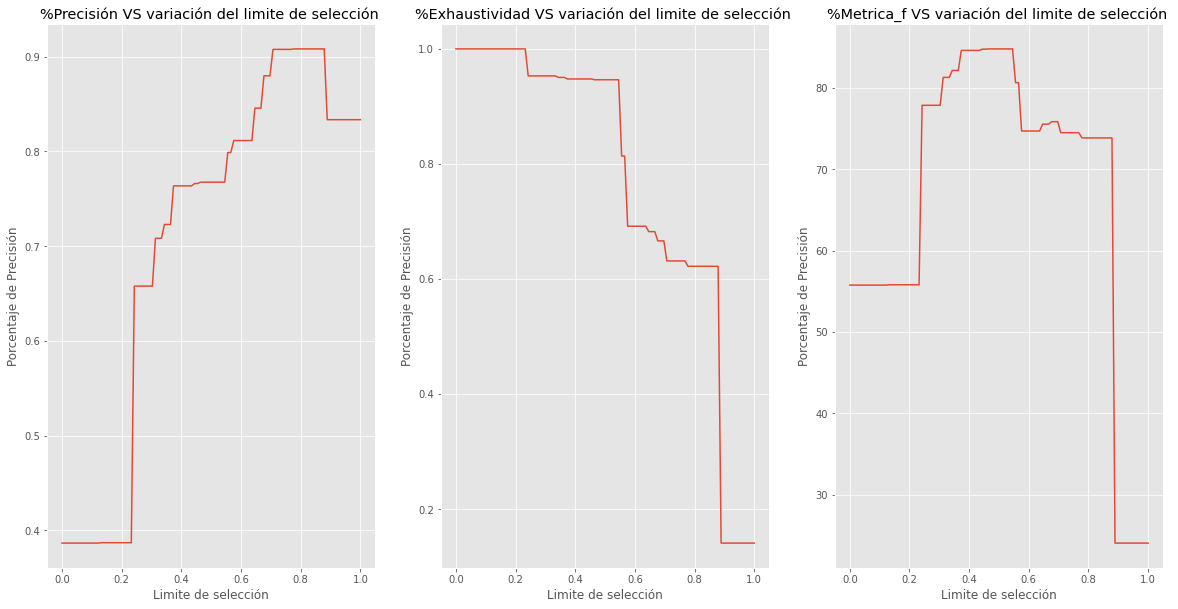

In [ ]:
precision=[]
exhaustividad=[]
metrica_f=[]
for lim in range(0,100):
  pred=0
  tabla_weighted['Pred']=np.where(tabla_weighted['Weighted'] > lim/100, 1, 0)
  pred=len(tabla_weighted[tabla_weighted['Pred']==1])
  ve_po=len(tabla_weighted[(tabla_weighted['Pred']==1)&(tabla_weighted.Real==1)])
  precision.append(ve_po/pred)
  exhaustividad.append(ve_po/len(tabla_weighted[tabla_weighted.Real==1]))
  metrica_f.append((((ve_po/pred)* (ve_po/len(tabla_weighted[tabla_weighted.Real==1])))/((ve_po/pred)+ (ve_po/len(tabla_weighted[tabla_weighted.Real==1]))))*200)
nom=np.linspace(0,1,100)
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.plot(nom,precision)
plt.title("%Precisión VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,2)
plt.plot(nom,exhaustividad)
plt.title("%Exhaustividad VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
plt.subplot(1,3,3)
plt.plot(nom,metrica_f)
plt.title("%Metrica_f VS variación del limite de selección ")   # Establece el título del gráfico
plt.xlabel("Limite de selección")   # Establece el título del eje x
plt.ylabel("Porcentaje de Precisión")
print(np.max(metrica_f))   

In [ ]:
maximosS=[]
for m in metrica_f_svm:
  maximosS.append(m*100)
print(maximosS)

[88.67336468094223, 77.4659403709683, 88.67336468094223, 77.4659403709683, 83.1973336398115, 88.67336468094223, 83.1973336398115, 83.1973336398115, 53.739836386049234, 88.67336468094223, 88.67336468094223, 78.04966014703842, 90.30634517707874, 89.22970050974982, 83.1973336398115, 91.23897561665801, 83.1973336398115, 82.9063422745038, 89.763381197309, 88.67336468094223, 90.37640881000699, 91.23897561665801, 83.05171494239679, 91.23897561665801, 89.31872146118722, 90.93339357656538]


In [ ]:
print('Bagging',str(np.amax(maximos)))
print('Boosting',str(np.amax(maximosB)))
print('staking',str(np.amax(maximosS)))
print('hard',str(np.amax(maximosHV)))
print('soft',str(np.amax(maximos_wei)))

Bagging 85.65488565488566
Boosting 90.8418131359852
staking 91.23897561665801
hard 90.8418131359852
soft 90.8418131359852


Grafico multimodelo

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]
130
130
130
130
130
130
[(1.0, 0.6107480029048659, 0.0, 1.0), (0.7811511701454774, 1.0, 0.18659076533839347, 1.0), (1.0, 0.5090777051561368, 0.0, 1.0), (0.6672991777356103, 1.0, 0.30044275774826057, 1.0), (0.9709044908285893, 0.9593318809005086, 0.0, 1.0), (1.0, 0.33478576615831535, 0.0, 1.0), (1.0, 0.872185911401598, 0.0, 1.0), (1.0, 0.9157588961510532, 0.0, 1.0), (0.0, 0.0, 0.5, 1.0), (1.0, 0.3057371096586785, 0.0, 1.0), (1.0, 0.5962236746550474, 0.0, 1.0), (0.6546489563567361, 1.0, 0.31309297912713474, 1.0), (1.0, 0.712418300653595, 0.0, 1.0), (1.0, 0.34931009440813376, 0.0, 1.0), (0.983554712

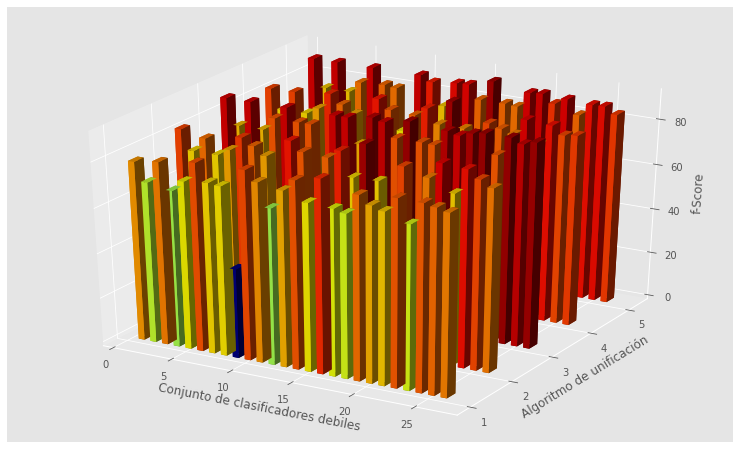

In [ ]:
xpos=np.concatenate((np.arange(1,27),np.arange(1,27),np.arange(1,27),np.arange(1,27),np.arange(1,27)))
ypos=np.concatenate((np.ones(26),np.ones(26)*2,np.ones(26)*3,np.ones(26)*4,np.ones(26)*5))
zpos=np.zeros(130)
print(ypos)
print(len(ypos))
print(len(xpos))
print(len(zpos))
dx=np.ones(130)*0.5
dy=np.ones(130)*0.2
print(len(dx))
print(len(dy))
dz=np.concatenate((maximos,maximosB,maximosS,maximosHV,maximos_wei))
print(len(dz))
fig = plt.figure(figsize=(13,8))
ax = plt.axes(projection="3d")
cmap = cm.get_cmap('jet')
rgba = [cmap((k-40)/53) for k in dz] 
print(rgba)
ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
ax.set_xlabel('Conjunto de clasificadores debiles')
ax.set_zlabel('f-Score')
ax.set_ylabel('Algoritmo de unificación')

#blue_proxy = plt.Rectangle((1, 1), 10, 10, fc='#000035')
#red_proxy = plt.Rectangle((1, 1), 10, 10, fc='#003000')
#ax.legend([blue_proxy,red_proxy],['Plásmidos','Cromosomas'])
#ax.title('Histograma de Profundidad de Cromosoma Vs Plásmidos')
#

#ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
plt.show()

In [ ]:
maximos-np.ones(26)*40

array([39.35368043, 31.34502924, 40.95238095, 29.53125   , 34.44668008,
       43.33333333, 35.73529412, 35.1565762 ,  0.        , 43.87096774,
       39.56521739, 29.3877551 , 37.89934354, 43.14606742, 34.60035524,
       45.65488565, 33.92857143, 32.79693487, 41.63265306, 38.09187279,
       36.48261759, 43.00395257, 33.01038062, 42.8       , 41.89655172,
       40.68833652])